# Data Science Code Refactoring Example
by John DeJesus

This is the notebook for the [Data Science Code Refactoring Example Video](https://www.youtube.com/watch?v=zIakz2_b1Lc).<br>
The function used is from the [ECDF Youtube Tutorial](https://github.com/JohnDeJesus22/YoutubeTutorials/blob/master/What%2C%20Why%2C%20and%20How%20to%20use%20ECDFs.ipynb).<br>
You may read this on its own or follow along with the video.

## From this example you will be able to:

* Understand an example of code refactoring.
* Begin to see the trade off of memory vs speed through a function.


###  What is Code Refactoring? 
It is the modification of code to make improvements in readability and performance.

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
sns.set()

In [2]:
# Load the data from data.world
avocado = pd.read_csv('https://query.data.world/s/qou5hvocejsu4qt4qb2xlndg5ntzbm')

### Recall our function to plot an ecdf. Look at the line where we create the y-axis.

In [3]:
# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)################
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

Notice that we call the `len()` function twice. In exchange for a little bit of memory usage, we can make this code more efficient in terms of speed. 
Specifically, we can assign the length of the data to a variable `length`. This will save this value in memory and allow us to access it for creating the y-axis.

So we trade<br>
`yaxis = np.arange(1, len(data)+1)/len(data)`<br>
for<br>
`length = len(data)`<br>
`yaxis = np.arange(1,length+1)/length`

#### ECDF Function with modifications

In [4]:
def plot_ecdf_vtwo(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    length = len(data)###################
    yaxis = np.arange(1,length+1)/length#####################
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

### Function Comparision

Now lets compare the run time a bit of each function.

0.04869723320007324


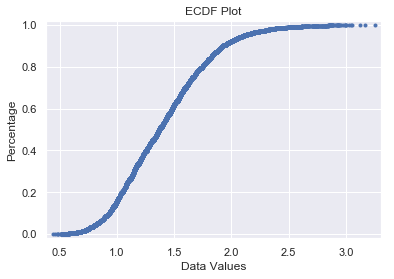

In [5]:
start1 = time.time()
plot_ecdf(avocado['AveragePrice'])
end1 = time.time()
diff1 = end1-start1
print(diff1)

0.02929234504699707


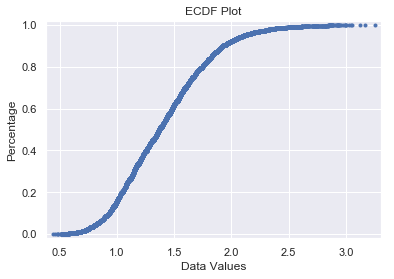

In [6]:
start2 = time.time()
plot_ecdf_vtwo(avocado['AveragePrice'])
end2 = time.time()
diff2 = end2-start2
print(diff2)

In [7]:
diff1-diff2

0.019404888153076172

Nice! We saved about 2 hundredth of a second! This may not seem like much for this task, but consider when you are working with a large amount of data, building a machine learning model, or a web-based dashboard. This is extra efficiently that can be provided so that your work runs faster and smoother.

# Practice Exercises

* Study [more code refactoring examples](https://pybit.es/refactoring.html).
* Review your own code.
* Look for code where you are reusing a function more than once. Then try to refactor the code so you are only using that function only once.


# Summary

* Code Refactoring is done to make code more readable and improve performance. 
* This will allow your analysis and ML projects to run more efficiently.


# Thanks for watching/reading! Let me know if you found this helpful by hitting
# 'like' on the video and subscribing to my Youtube Channel.

* [Tony Fischetti Twitter](https://twitter.com/tonyfischetti?lang=en)
* [Video Tutorial](https://www.youtube.com/watch?v=zIakz2_b1Lc)
* [GitHub](http://github.com/johndeJesus22)
* [Twitter](https://twitter.com/johnnydata22)
* [LinkedIn](https://www.linkedin.com/in/jdejesus22/)
